In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/diabetes (1).csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#replace zero with NaN VALUES
data.replace({'Pregnancies':0, 'Glucose': 0, 'BloodPressure': 0, 'SkinThickness': 0, 'Insulin': 0, 'BMI': 0}, np.nan, inplace=True)


In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [52]:
from sklearn.impute import SimpleImputer

In [53]:
# Impute NaN values with mean of each column
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


In [61]:
data_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [62]:
#to check missing values
data_imputed.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

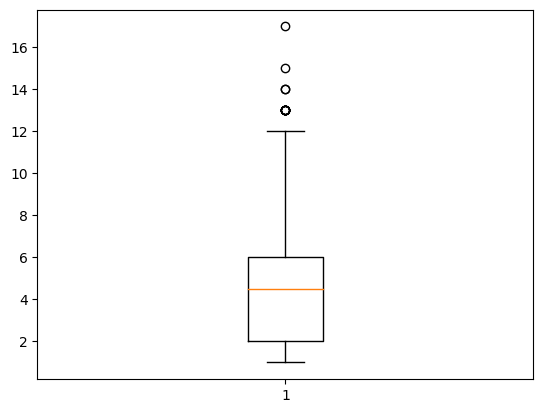

In [63]:
plt.boxplot(data_imputed['Pregnancies'])
plt.show()

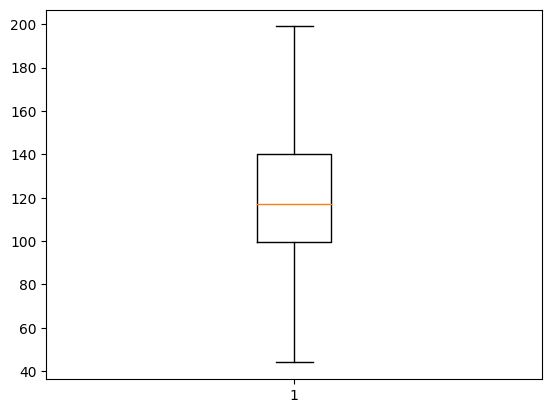

In [64]:
plt.boxplot(data_imputed['Glucose'])
plt.show()

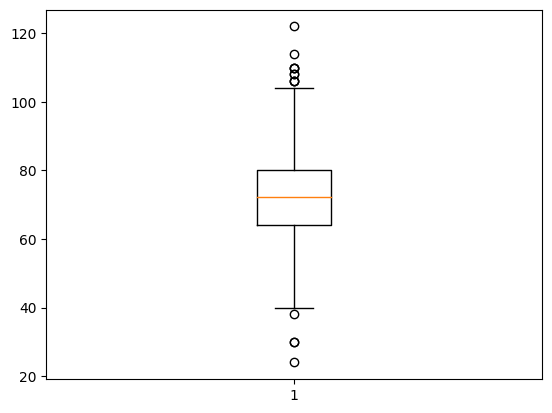

In [65]:
plt.boxplot(data_imputed['BloodPressure'])
plt.show()

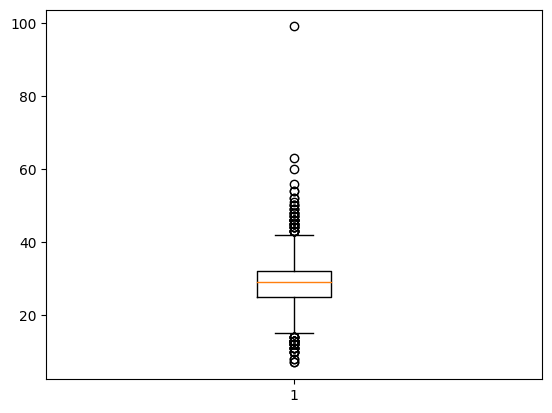

In [66]:
plt.boxplot(data_imputed['SkinThickness'])
plt.show()

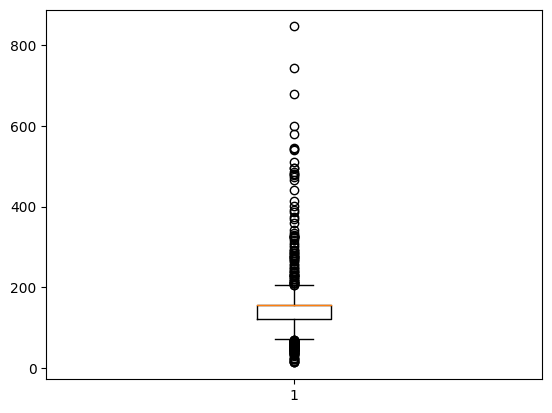

In [67]:
plt.boxplot(data_imputed['Insulin'])
plt.show()

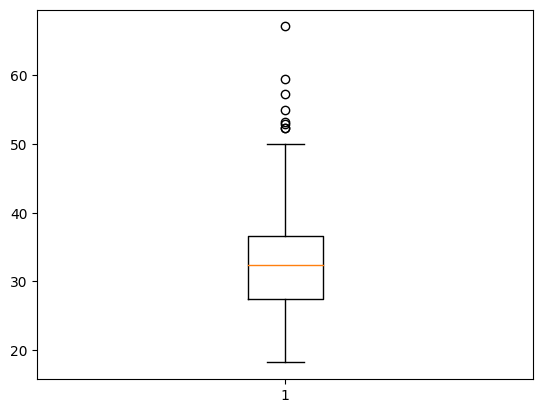

In [68]:
plt.boxplot(data_imputed['BMI'])
plt.show()

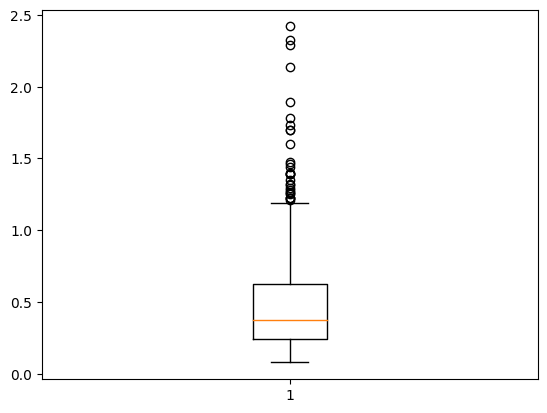

In [69]:
plt.boxplot(data_imputed['DiabetesPedigreeFunction'])
plt.show()

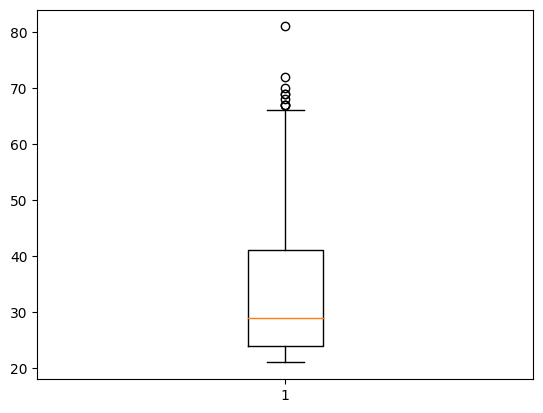

In [70]:
plt.boxplot(data_imputed['Age'])
plt.show()

In [71]:
#to check the relationshio btw independent and dependent variables
data_imputed.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.154290,0.259117,0.131819,0.068077,0.110590,-0.005658,0.511662,0.248263
Glucose,0.154290,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.259117,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.131819,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.068077,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.110590,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.005658,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.511662,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.248263,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


In [48]:
import seaborn as sns

<Axes: >

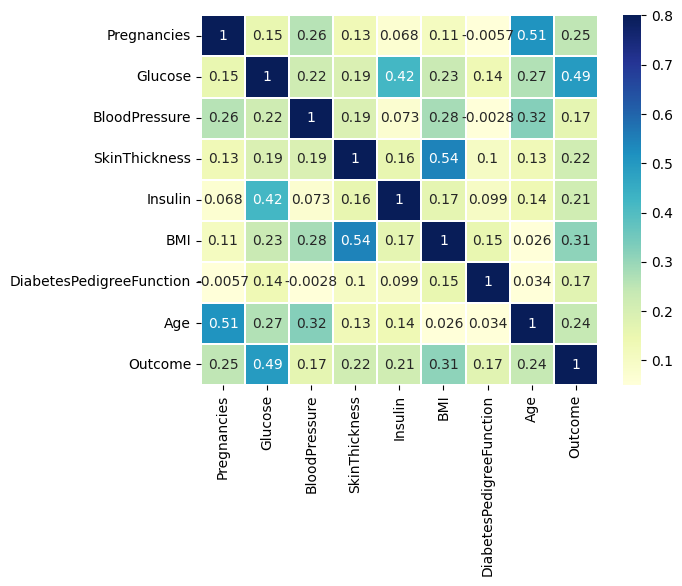

In [72]:
#to plot the correlation
corrmatrix = data_imputed.corr()
sns.heatmap(corrmatrix , annot = True , cmap = 'YlGnBu' , vmax = 0.8,vmin = 0.05,linewidth = 0.2)

In [73]:
# Split data into features and target variable
X = data_imputed.drop('Outcome', axis=1)
y = data_imputed['Outcome']


In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.svm import SVC

In [79]:
# Train SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)


SVC(random_state=42)

In [80]:
# Predictions
y_pred = svm_classifier.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score, classification_report

In [82]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7467532467532467
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        99
         1.0       0.67      0.58      0.62        55

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154

